# California Housing Market Analysis

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from scipy import stats


## Section 1: Loading and Exploring the Data
Loading the California housing dataset and converting it into a Pandas DataFrame.

In [100]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Load and Explore the Data

### Names and data types of the columns

In [103]:
 print(df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


### Summary statistics of the dataset.

In [105]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

### 3- Finding Missing values in the dataset.

In [107]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


## Feature Engineering and Cleaning

###  Creating a new column rooms_per_household = AveRooms / AveOccup.

In [110]:
df['rooms_per_household'] = df['AveRooms']/df['AveOccup']

### Creating another column bedrooms_per_room = AveBedrms / AveRooms.

In [112]:
df['bedrooms_per_room'] = df['AveBedrms'] / df['AveRooms']

### Correlation matrix of all numerical columns using .corr() and visualization with a heatmap.

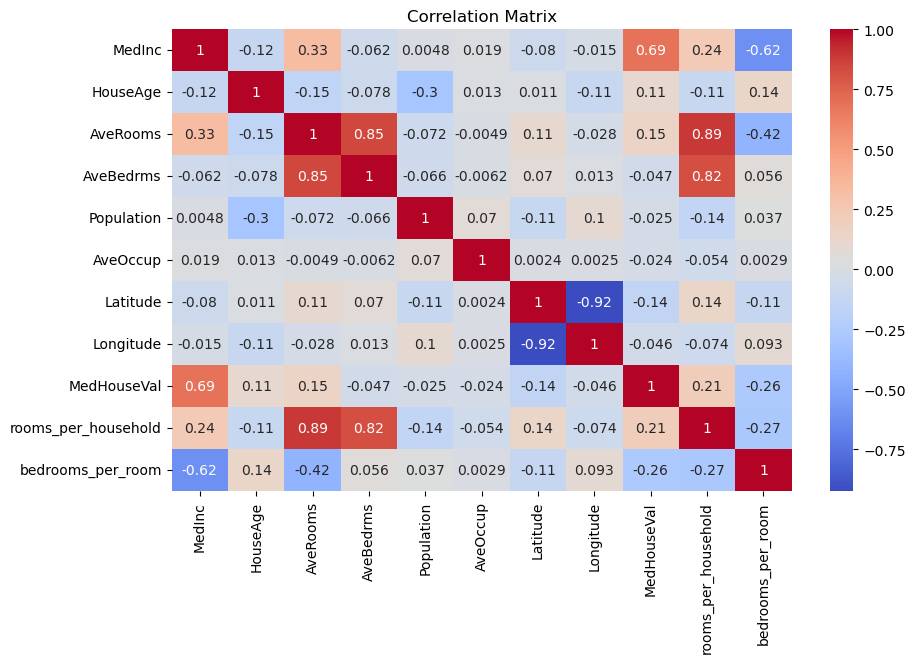

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Data Visualization

### Distribution of the target variable MedHouseVal using a histogram.

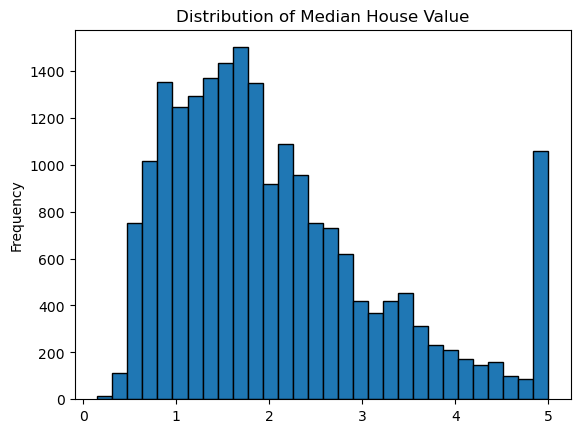

In [117]:
df['MedHouseVal'].plot.hist(bins=30, edgecolor='black')
plt.title('Distribution of Median House Value')
plt.show()

### Scatter plot of MedInc vs MedHouseVal.

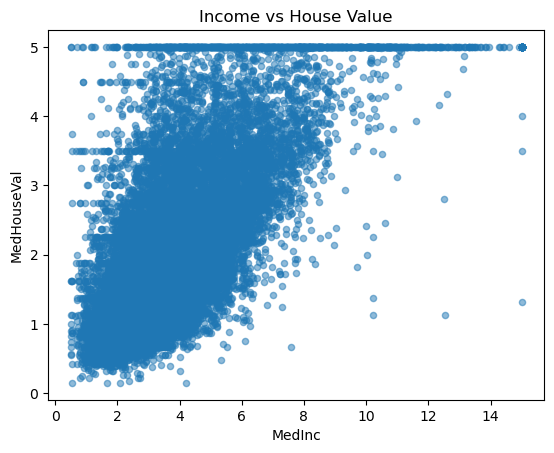

In [119]:
df.plot.scatter(x='MedInc', y='MedHouseVal', alpha=0.5)
plt.title('Income vs House Value')
plt.show()

### Box plot to visualize the distribution of AveOccup across quartiles.

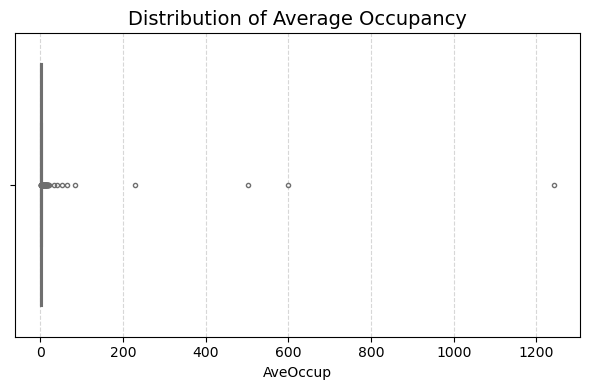

In [121]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['AveOccup'], color='skyblue', fliersize=3, linewidth=1.5)
plt.title('Distribution of Average Occupancy', fontsize=14)
plt.xlabel('AveOccup')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Pairplot of MedHouseVal, MedInc, AveRooms, and Households.

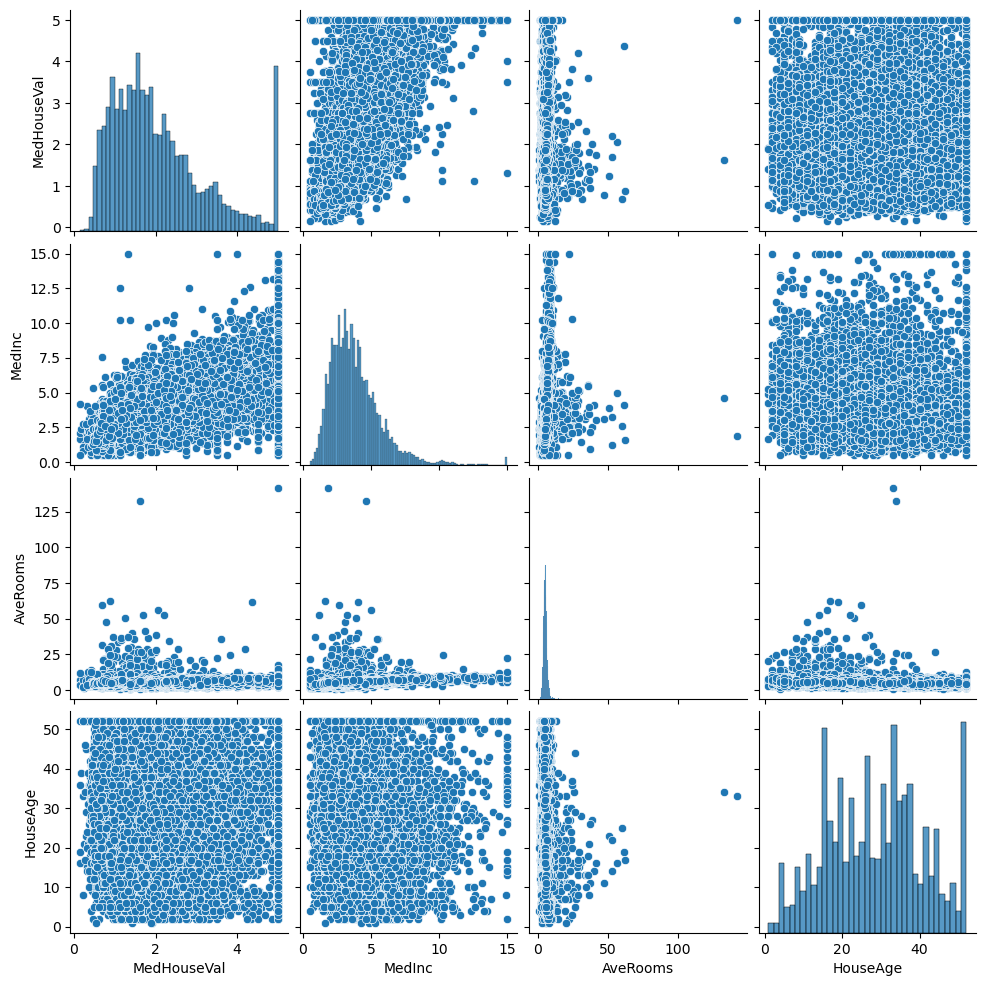

In [123]:
sns.pairplot(df[['MedHouseVal', 'MedInc', 'AveRooms', 'HouseAge']])
plt.show()

### Area chart comparing AveRooms and AveOccup over the first 100 rows.

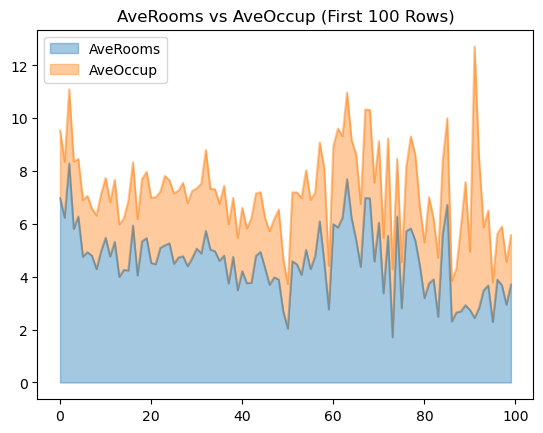

In [125]:
df[['AveRooms', 'AveOccup']].head(100).plot.area(alpha=0.4)
plt.title('AveRooms vs AveOccup (First 100 Rows)')
plt.show()

 ### Testing if the correlation between MedInc and MedHouseVal is statistically significant using Pearson’s correlation.

In [127]:
from scipy.stats import pearsonr
r, p = pearsonr(df['MedInc'], df['MedHouseVal'])
print(f"r={r:.2f}, p={p:.2e}")
# Strong positive correlation. statistically significant since p < 0.05.

r=0.69, p=0.00e+00


### Two-sample t-test:

In [129]:
from scipy.stats import ttest_ind

group1 = df[df['MedInc'] > df['MedInc'].median()]['MedHouseVal']
group2 = df[df['MedInc'] <= df['MedInc'].median()]['MedHouseVal']
t, p = ttest_ind(group1, group2)
print(f"t={t:.2f}, p={p:.2e}")
# Significant difference in house values between high and low income groups.

t=86.36, p=0.00e+00


### Checking for outliers in AveRooms using Z-score method and counting how many there are.

In [131]:
from scipy.stats import zscore
z = np.abs(zscore(df['AveRooms']))
print((z > 3).sum())

#There are 133 outliers in AveRooms if we count rooms that are more than 3 standard deviations away.

133


### Normalizing MedInc using z-score normalization

In [133]:
df['MedInc_z'] = zscore(df['MedInc'])

##  Insight & Interpretation

### Variables most positively correlated with MedHouseVal

In [136]:
corr = df.corr(numeric_only=True)['MedHouseVal'].drop(['MedHouseVal', 'MedInc']) #excluding MedHouseVal and MedInc since MedInc_z and MedInc will have same correlation with MedHouseVal.
print(corr.sort_values(ascending=False).head(3))

MedInc_z               0.688075
rooms_per_household    0.209482
AveRooms               0.151948
Name: MedHouseVal, dtype: float64


### Variables most negatively correlated with MedHouseVal

In [138]:
corr = df.corr(numeric_only=True)['MedHouseVal'].drop(['MedHouseVal', 'MedInc'])
print(corr.sort_values().head(3))

bedrooms_per_room   -0.255624
Latitude            -0.144160
AveBedrms           -0.046701
Name: MedHouseVal, dtype: float64


### Grouping the data by binned MedInc values (5 bins) and computing the average house value in each.

In [140]:
df['IncomeBin'] = pd.qcut(df['MedInc_z'], 5)
print(df.groupby('IncomeBin')['MedHouseVal'].mean())

IncomeBin
(-1.775, -0.799]    1.184027
(-0.799, -0.384]    1.570300
(-0.384, 0.0507]    1.938895
(0.0507, 0.652]     2.300291
(0.652, 5.858]      3.349910
Name: MedHouseVal, dtype: float64


C:\Users\amnee\AppData\Local\Temp\ipykernel_19440\71718766.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('IncomeBin')['MedHouseVal'].mean())


### Summary:

#### More rooms per household often means more expensive homes.

#### More crowded households correlate with lower home values.

### 20- Suggestions for real estate analysts based on these insights:

In [30]:
#### Focus on areas with higher median income for premium listings.

#### they Watch for overcrowded regions because tend to have lower-value properties.